<a href="https://colab.research.google.com/github/rat04/2024-1-my-BDA/blob/main/inclass/05w_0403_wed_B_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


# 코랩에서 한글 처리

In [ ]:
!pip install koreanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.5 MB/s eta 0:00:00


In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:

# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

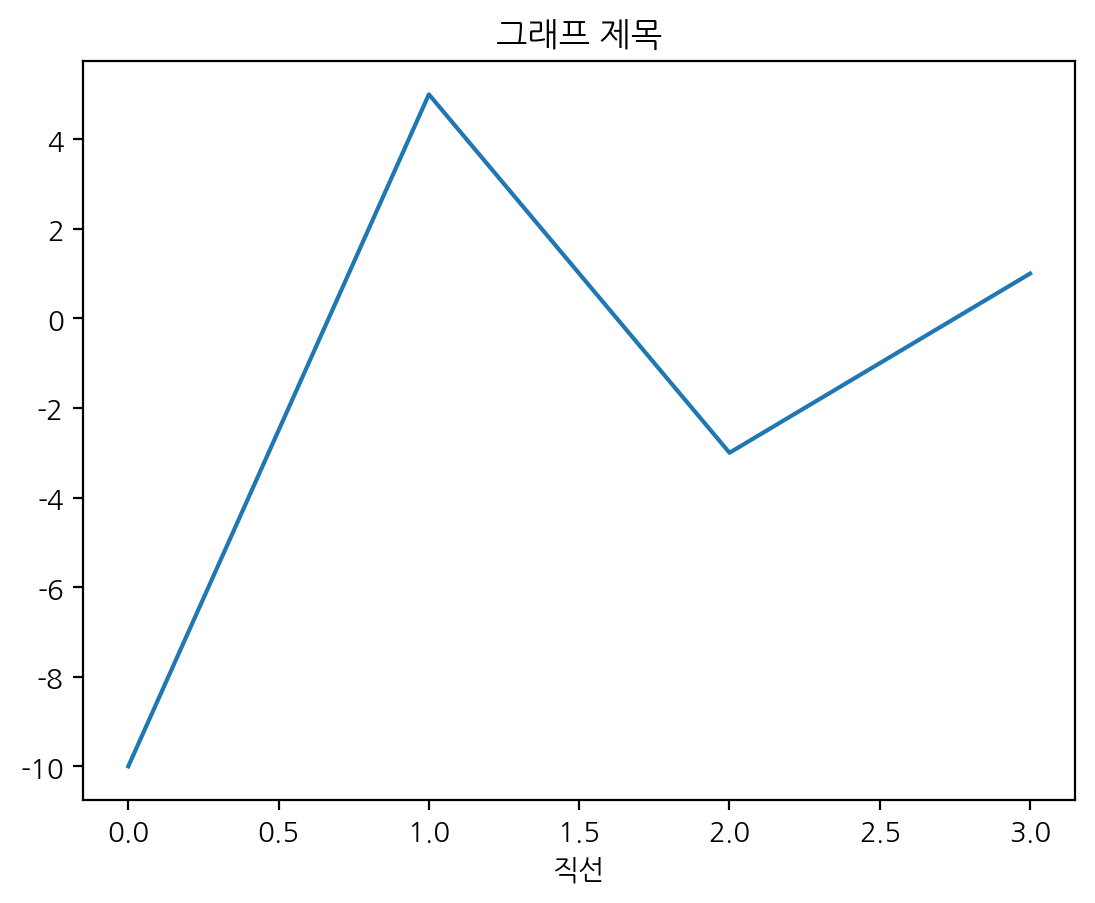

In [ ]:

import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

# 수업에서 사용할 데이터를 다음 깃에서 복사



In [ ]:

!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.10 MiB/s, done.


In [ ]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
10,11,3,65,65,65
15,16,4,58,98,65
13,14,4,48,87,12
14,15,4,75,56,78


In [ ]:

exam.agg('mean')

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [ ]:
exam.agg(['mean', 'median'])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [ ]:
exam.agg(mean_math = ('math', 'mean')) # 시험 예상

,math
mean_math,57.45


In [ ]:

import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:

df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=0) # 시험 예상

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=1) # 시험 예상

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


In [ ]:

df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [ ]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean')) # 인자 행명 = ("열명", "적용함수")

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [ ]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [ ]:
df.agg("mean")

A    4.0
B    5.0
C    7.0
dtype: float64

In [ ]:
df.agg("mean", axis=0)

A    4.0
B    5.0
C    7.0
dtype: float64

In [ ]:
df.agg("mean", axis='index')

A    4.0
B    5.0
C    7.0
dtype: float64

In [ ]:
df.agg("mean", axis=1)

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [ ]:
df.agg("mean", axis='columns')

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [ ]:

df.agg(['sum', "mean"], axis='columns')

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [ ]:

df.agg(['sum', "mean"], axis='columns')

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


## 집단별 요약 통계량 구하기

In [ ]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam.groupby('nclass').agg('mean')

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:

exam.groupby('nclass').agg('mean')[["math", "english", "science"]]

,math,english,science
nclass,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [ ]:

exam.groupby('nclass').agg(['min', 'max', 'mean'])

id           math            english            science           
       min max  mean  min max   mean     min max   mean     min max   mean
nclass                                                                    
1        1   4   2.5   30  60  46.25      86  98  94.75      50  78  61.50
2        5   8   6.5   25  90  61.25      78  90  84.25      25  98  58.25
3        9  12  10.5   20  65  45.00      65  98  86.50      15  65  39.25
4       13  16  14.5   46  75  56.75      56  98  84.75      12  78  55.00
5       17  20  18.5   65  89  78.00      68  83  74.25      58  98  83.25

In [ ]:

exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg(meanmath = ('math', 'mean'))

,meanmath
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
# 인자 사용 방법: 사전 형식
# {'열명': '함수명'}
exam.groupby('nclass').agg({'math': 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
# dict of axis labels -> functions, function names or list of such.
# {'열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

## (알아 두면 좋아요) 변수를 인덱스로 바꾸지 않기

In [ ]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:

exam.groupby('english').agg(math_mean = ('math', 'mean'))

,math_mean
english,
56,75.00
65,65.00
68,77.00
78,85.00
80,25.00
83,78.00
85,45.00
86,45.00
87,48.00


In [ ]:

exam.groupby('nclass').agg(math_mean = ('math', 'mean'))

,math_mean
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:

exam.groupby('nclass', as_index=False).agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


## DataFrameGroupBy 객체

In [ ]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
range(10)

range(0, 10)

In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:

list(exam.groupby('nclass'))

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [ ]:
list(exam.groupby('nclass'))[0][1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:

list(exam.groupby('nclass'))[1][1]


,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [ ]:

for key, value in exam.groupby('nclass'):
    print(key, '\n')
    print(type(value))
    print(value, "\n", '='*40, "\n")


1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  15       4    75       56       78
15  16       4    58       98       65 

5 

<class 'pandas.core.frame.DataFrame'>
    id  ncla

## 여러 요약 통계량 한 번에 구하기

In [ ]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)

exam.groupby('nclass') \
    .agg(mean_math = ('math','mean'),
         sum_math = ('math','sum'),
         median_math = ('math','median'),
         n = ('nclass','count')
         )

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


In [ ]:
exam.groupby('nclass').agg("mean")

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


# 집단별로 다시 집단 나누기

In [ ]:
import pandas as pd

#mpg 시험 예상
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

#columns 뭐가뭔지 밑에 내용들 시험에 나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
mpg.columns
#이거시험

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

In [ ]:
mpg.sample(frac=.02)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
50,dodge,dakota pickup 4wd,3.9,1999,6,auto(l4),4,13,17,r,pickup
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup
76,ford,expedition 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
72,dodge,ram 1500 pickup 4wd,5.7,2008,8,auto(l5),4,13,17,r,pickup


In [ ]:
# 제조회사 및 구동 방식별 분리
# 도심연비 평균 구하기
# 이런게 시험 문제
mpg.groupby(["manufacturer","drv"]).mean()[["cty"]]

<ipython-input-55-c3eb4d541eaa>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg.groupby(["manufacturer","drv"]).mean()[["cty"]]


cty
manufacturer drv       
audi         4    16.82
             f    18.86
chevrolet    4    12.50
             f    18.80
             r    14.10
dodge        4    12.00
             f    15.82
ford         4    13.31
             r    14.75
honda        f    24.44
hyundai      f    18.64
jeep         4    13.50
land rover   4    11.50
lincoln      r    11.33
mercury      4    13.25
nissan       4    13.75
             f    20.00
pontiac      f    17.00
subaru       4    19.29
toyota       4    14.93
             f    21.37
volkswagen   f    20.93

In [ ]:
# 제조 회사 와 차종별 분리
# cty 평균 구하기
# hwy 평균 구하기

mpg.groupby(["manufacturer","category"]).agg(mean_cty= ('mean','cty'), mean_hwy ('h


SyntaxError: unterminated string literal (detected at line 5) (<ipython-input-57-e012ae0ac1db>, line 5)

In [ ]:

mpg.groupby(["manufacturer", "drv"]).agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [ ]:
# 추가: 고속도로(hwy) 평균 연비
mpg.groupby(["manufacturer", "drv"]).agg(mean_cty = ('cty', 'mean'), mean_hwy = ('hwy', 'mean'))

mean_cty  mean_hwy
manufacturer drv                    
audi         4       16.82     25.27
             f       18.86     28.29
chevrolet    4       12.50     16.25
             f       18.80     27.60
             r       14.10     21.30
dodge        4       12.00     16.08
             f       15.82     22.36
ford         4       13.31     17.15
             r       14.75     21.75
honda        f       24.44     32.56
hyundai      f       18.64     26.86
jeep         4       13.50     17.62
land rover   4       11.50     16.50
lincoln      r       11.33     17.00
mercury      4       13.25     18.00
nissan       4       13.75     18.00
             f       20.00     27.56
pontiac      f       17.00     26.40
subaru       4       19.29     25.57
toyota       4       14.93     18.80
             f       21.37     29.74
volkswagen   f       20.93     29.22

In [ ]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"').groupby('drv').agg( count = ('drv', 'count'))

,count
drv,
4,11
f,7


## (알아 두면 좋아요) value_counts()로 집단별 빈도 간단하게 구하기

In [ ]:
mpg.groupby('drv').agg( n= ('drv','count'))

,n
drv,
4,103
f,106
r,25


In [ ]:
mpg[['drv']].value_counts()

drv
f      106
4      103
r       25
dtype: int64

In [ ]:
mpg[['drv']].value_counts().to_frame()

,0
drv,
f,106
4,103
r,25


In [ ]:
mpg[['drv','cyl']].value_counts()

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [ ]:
mpg[['drv','cyl']].value_counts().to_frame()

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [ ]:
mpg['drv'].value_counts().to_frame() # 열 제목

,drv
f,106
4,103
r,25


In [ ]:
mpg['drv'].value_counts().to_frame().query('drv >100')

,drv
f,106
4,103


In [ ]:
mpg.groupby('drv').agg(n=('drv','count'))

,n
drv,
4,103
f,106
r,25


## pandas 함수 조합하기

# 06-7 데이터 합치기

시험문제에꼭나옴


In [ ]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id' : [1,2,3,4,5],
                      'midterm' : [60,80,70,90,85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id' : [1,2,3,4,5],
                      'final' : [70,83,65,95,80]})

In [ ]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [ ]:
pd.merge(test1,test2)

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
pd.merge(test1,test2,how='inner', on='id')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
test1.merge(test2, on='id',how='inner')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


## 심화 학습 : 공식 메뉴얼 문서


In [ ]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [ ]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [ ]:
# key 및 rkey 열에 df1 및 df2를 병합, 공통 키가 다른 경우
# 값 열에는 기본 접미사인 _x 및 _y가 추가
pd.merge(df1, df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [ ]:
df1.merge(df2, left_on='lkey', right_on='rkey')


,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [ ]:
# 겹치는 열에 지정된 왼쪽 및 오른쪽 접미사를 추가하여 DataFrames df1 및 df2를 병합 .
df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_left', '_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [ ]:
df1.merge(df2, how='outer')

,lkey,value,rkey
0,foo,1,NaN
1,bar,2,NaN
2,baz,3,NaN
3,foo,5,foo
4,NaN,6,bar
5,NaN,7,baz
6,NaN,8,foo


In [ ]:
df1.merge(df2, how='cross') # 두 프레임 모두에서 데카르트 곱을 생성하고 왼쪽 키의 순서를 유지

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,bar,6
2,foo,1,baz,7
3,foo,1,foo,8
4,bar,2,foo,5
5,bar,2,bar,6
6,bar,2,baz,7
7,bar,2,foo,8
8,baz,3,foo,5
9,baz,3,bar,6


# 정리하기

In [ ]:
# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total').head()

## 6. 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])

NameError: name 'group_a' is not defined